# Regression and Classification Methods

### Import necessary libraries

In [1]:
import piplite
await piplite.install('seaborn')

In [153]:
import pandas as pd

from matplotlib import pyplot
import seaborn as sn

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report, roc_auc_score

## A) Regression

### 1. Dataset Selection and Objective Definition

We will work on a [car price prediction](https://www.kaggle.com/datasets/erolmasimov/price-prediction-multiple-linear-regression) dataset which can help new car selling companies to set up their price in the market. With this dataset, the objective is being able to guess the price of a car based on different features such as doornumbers, fuelsystem, compression ratio, etc. Let's investigate our dataset for more information.

In [36]:
car_price = pd.read_csv("scrap price.csv")
car_price

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#### Check the columns 

In [37]:
car_price.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

The different columns of the dataset are:
* symboling
* name
* fueltypes
* aspiration
* doornumbers
* carbody
* drivewheels
* enginelocation
* wheelbase carlength
* carwidth
* carheight
* curbweight
* enginetype
* cylindernumber
* enginesize
* fuelsystem
* boreratio
* stroke
* compressionratio
* horsepower
* peakrpm
* citympg
* highwaympg
* price: the price of the carrice

### 2. Data Preprocessing

#### Get basic information of the dataset

In [5]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

The dataset has 205 observations and 26 columns.

#### Removing the id column

We will remove the ID column as we do not need it for machine learning purposes.

In [6]:
car_price = car_price.drop('ID',axis=1)
car_price.columns

Index(['symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#### Finding missing values

In [7]:
car_price.isnull().sum()

symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

The dataset does not seem to have any null values.

#### Looking for duplicated observations

In [8]:
car_price.duplicated().sum()

0

There are no duplicated observations in the dataset.

#### Checking column values

We will specifically look at the name column as there seem to be multiple values in it.

In [9]:
car_price.name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We will transform the name of the cars so that we only pick the model name at the start. We will create a new column called model_name to hold these new values, and delete the old **name** column.

In [38]:
model_name = car_price['name'].apply(lambda x : x.split(' ')[0])
car_price.insert(3,'model_name', model_name)
car_price.drop(['name'],axis=1,inplace=True)
car_price['model_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Furthermore, some values are repeated twice such as **Nissan** and **nissan** as it it case sensitive. So we will address that by transforming the uppercase values to lower case values.
We also notice that some values such as maxda, porcshe, toyouta, vokswagen and vw are mispelled. We will also address that by replacing the values with the correct ones.

In [39]:
car_price['model_name'] = car_price['model_name'].replace(
    {'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
car_price['model_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Checking distribution

<AxesSubplot:xlabel='price', ylabel='enginesize'>

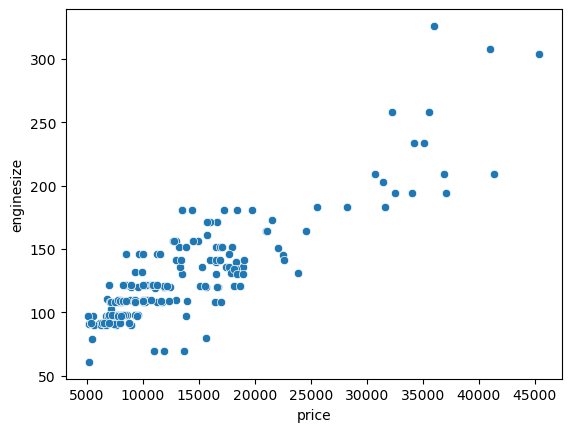

In [40]:
sn.scatterplot(data=car_price, x="price", y="enginesize")

We can see from this plot that there is a positive linear relationship between the variables price and enginesize. Most of the data points are on the left side of the plot, and a few are on the top right side.

#### Checking for outliers using boxplots

We will create a box plot for the target variable (price)

<AxesSubplot:>

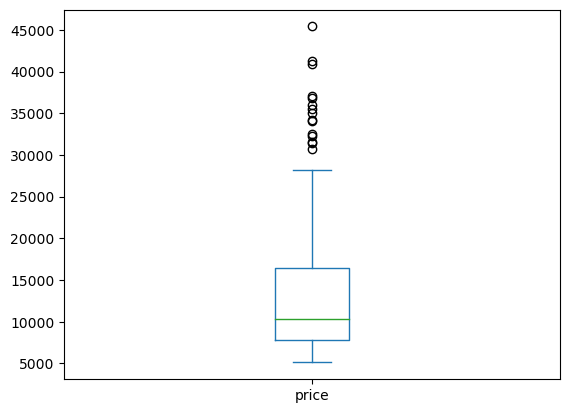

In [41]:
car_price.price.plot(kind='box')

The box plot above shows the outliers within the price variable. We will use the **Interquartile Range method** to address these outliers.

#### Addressing the outliers with the Interquartile Range method

In [42]:
Q1 = car_price['price'].quantile(0.25)
Q3 = car_price['price'].quantile(0.75)
IQR = Q3 - Q1
car_price = car_price[~((car_price['price'] < (Q1 - 1.5 * IQR))|(car_price['price'] > (Q3 + 1.5*IQR)))]

<AxesSubplot:>

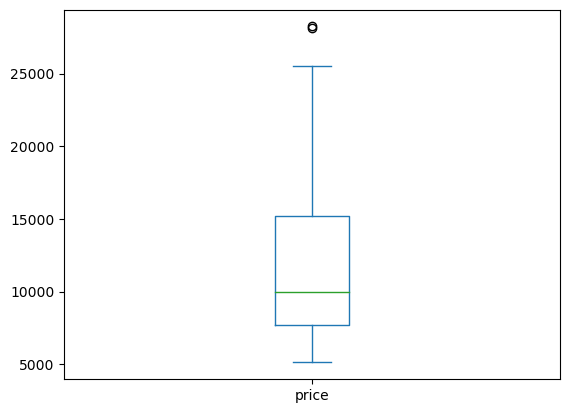

In [43]:
car_price.price.plot(kind='box')

We have seen a significant reduced number of outliers.

#### Checking correlation

<AxesSubplot:>

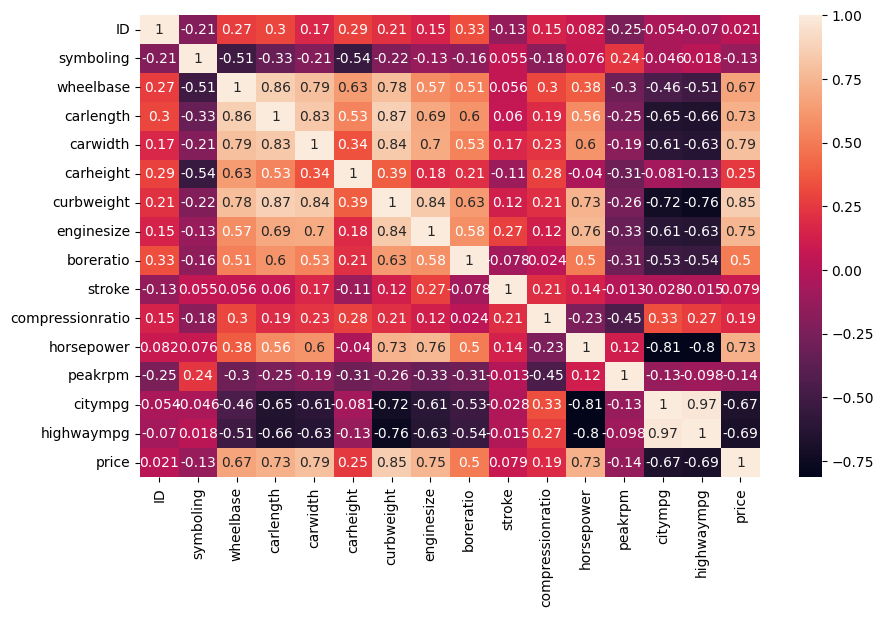

In [44]:
pyplot.figure(figsize=(10, 6))
correlations = car_price.corr(numeric_only=True)
sn.heatmap(correlations, annot=True)

We would like to use linear regression model on this dataset. However, with linear regression, independent variables should not be too highly correlated with each other.

We can see that the following variables are highly correlated:
* wheelbase and carlength 
* carlength and carwidth 
* carwidth and curbweight 
* curbweight and carlength
* curbweight and enginesize 
* curbweight and horsepower
* curbweight and citympg
* curbweight and highwaympg 
* horsepower and citympg 
* horsepower and highwaympg 
* citympg and highwaympg 

Between the highly correlated variables, we will remove the ones who have a weaker relationship with the price (dependent) variable. We will remove wheelbase, carlength, carwidth, highwaympg.

In [45]:
car_price = car_price.drop(columns=['wheelbase','carwidth','carlength','highwaympg'],axis=1)

In [46]:
car_price.columns

Index(['ID', 'symboling', 'model_name', 'fueltypes', 'aspiration',
       'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'price'],
      dtype='object')

#### Checking the variable types

In [47]:
car_price.dtypes

ID                    int64
symboling             int64
model_name           object
fueltypes            object
aspiration           object
doornumbers          object
carbody              object
drivewheels          object
enginelocation       object
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
price               float64
dtype: object

We can see that the variable types are object, float64, and int64.

Let's look at each of the object variables and their unique values.

In [48]:
column = car_price.select_dtypes(include=['object']).columns
for i in column:
    print("Unique values for {0} :".format(i), car_price[i].unique())

Unique values for model_name : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'mazda'
 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche'
 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
Unique values for fueltypes : ['gas' 'diesel']
Unique values for aspiration : ['std' 'turbo']
Unique values for doornumbers : ['two' 'four']
Unique values for carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values for drivewheels : ['rwd' 'fwd' '4wd']
Unique values for enginelocation : ['front']
Unique values for enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
Unique values for cylindernumber : ['four' 'six' 'five' 'three' 'two']
Unique values for fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


#### Transforming the values

We will categorize the variables into binary, ordinal, and nominal.

In [49]:
binary_labels = ['aspiration', 'doornumbers', 'enginelocation', 'fueltypes']

ordinal_labels = ['cylindernumber', 'symboling',
                  'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                  'peakrpm', 'citympg']

nominal_labels = ['carbody', 'drivewheels', 'enginetype', 'fuelsystem', 'model_name']

#### Address the ordinal and binary values

In [50]:
le = LabelEncoder()

for i in ordinal_labels:
    car_price[i] = le.fit_transform(car_price[i])

for i in binary_labels:
    car_price[i] = le.fit_transform(car_price[i])
    
car_price.head()

,ID,symboling,model_name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,5,alfa-romero,1,0,1,convertible,rwd,0,0,...,1,18,mpfi,23,4,12,30,9,5,13495.0
1,2,5,alfa-romero,1,0,1,convertible,rwd,0,0,...,1,18,mpfi,23,4,12,30,9,5,16500.0
2,3,3,alfa-romero,1,0,1,hatchback,rwd,0,12,...,2,28,mpfi,1,25,12,45,9,3,16500.0
3,4,4,audi,1,0,0,sedan,fwd,0,24,...,1,11,mpfi,13,22,21,27,15,8,13950.0
4,5,4,audi,1,0,0,sedan,4wd,0,24,...,0,22,mpfi,13,22,5,33,15,2,17450.0


We can see from the data sample above that the ordinal and binary variables have been converted into integers.

#### Tranform the nominal values

In [51]:
car_price = pd.get_dummies(data=car_price, columns=nominal_labels)

In [52]:
car_price.head()

,ID,symboling,fueltypes,aspiration,doornumbers,enginelocation,carheight,curbweight,cylindernumber,enginesize,...,model_name_nissan,model_name_peugeot,model_name_plymouth,model_name_porsche,model_name_renault,model_name_saab,model_name_subaru,model_name_toyota,model_name_volkswagen,model_name_volvo
0,1,5,1,0,1,0,0,92,1,18,...,0,0,0,0,0,0,0,0,0,0
1,2,5,1,0,1,0,0,92,1,18,...,0,0,0,0,0,0,0,0,0,0
2,3,3,1,0,1,0,12,113,2,28,...,0,0,0,0,0,0,0,0,0,0
3,4,4,1,0,0,0,24,66,1,11,...,0,0,0,0,0,0,0,0,0,0
4,5,4,1,0,0,0,24,114,0,22,...,0,0,0,0,0,0,0,0,0,0


In [53]:
car_price.dtypes

ID                          int64
symboling                   int32
fueltypes                   int32
aspiration                  int32
doornumbers                 int32
enginelocation              int32
carheight                   int32
curbweight                  int32
cylindernumber              int32
enginesize                  int32
boreratio                   int32
stroke                      int32
compressionratio            int32
horsepower                  int32
peakrpm                     int32
citympg                     int32
price                     float64
carbody_convertible         uint8
carbody_hardtop             uint8
carbody_hatchback           uint8
carbody_sedan               uint8
carbody_wagon               uint8
drivewheels_4wd             uint8
drivewheels_fwd             uint8
drivewheels_rwd             uint8
enginetype_dohc             uint8
enginetype_l                uint8
enginetype_ohc              uint8
enginetype_ohcf             uint8
enginetype_ohc

Now, our dataset is ready for the next phase.

### 3. Model Implementation and 4. evaluation

#### Feature selection and split the dataset

We will choose 80/20 for our data split.

In [91]:
# Feature selection 
y = car_price['price']
X = car_price.drop(['price'],axis=1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.1. Linear Regression

#### Create and train the model

In [76]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

#### Model evaluation

In [77]:
y_pred = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

Mean Absolute Error: 996.57
R-squared: 0.89


The mean absolute error of 996.57 means that the predictions are of by by around 996.57$ assuming that the car price is in dollars.

The R-squared value of 0.89 is closer to 1 than 0, which suggest a good fit.

#### 3.2. Random Forest

In [88]:
rdf_model = RandomForestRegressor()
rdf_model.fit(X_train, y_train)

RandomForestRegressor()

#### Model evaluation

In [90]:
y_pred = rdf_model.predict(X_test)
mae_rdf = mean_absolute_error(y_test, y_pred)
r2_rdf = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_rdf:.2f}")
print(f"R-squared: {r2_rdf:.2f}")

Mean Absolute Error: 817.54
R-squared: 0.92


We have a smaller MAE of 817.54 and a higher R-squared of 0.92. 

The Random Forest model appears to be better than the Linear Regression model.

#### 3.3. GradientBoostingRegressor

In [92]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

#### Model evaluation

In [93]:
y_pred = gbr_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_gb:.2f}")
print(f"R-squared: {r2_gb:.2f}")

Mean Absolute Error: 859.24
R-squared: 0.91


We have an MAE of around 859.24 and an R-Squared of 0.91. This model seems to fit better than the Linear Regression but perform less better than the Random Forest Regression.

### 5. Results Interpretation

From the results above, we can see that the 3 models perform reasonably well on the car_price dataset.
* The Random Forest Regressor has the highest R-square of 0.92 and the lowest MAE of 817.54. This suggest that it has the best performance among the three models.
* The Linear Regression model has an R-square value of 0.89 and an MAE of 996.57. Even if it is not performing as well as well as the Random Forest model, it still explains a significant amount of the variance in the target variable.
* The performance of the Gradient Boosting Regressor falls  between the two models with an R-squared value of 0.91 and an MAE of 859.24.

### Visualize the findings

We will create bar plots to visually compare the metrics received from the previous trained models.

In [94]:
reg_models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mae_list = [mae_lr, mae_rdf, mae_gb]
r2_list = [r2_lr, r2_rdf, r2_gb]

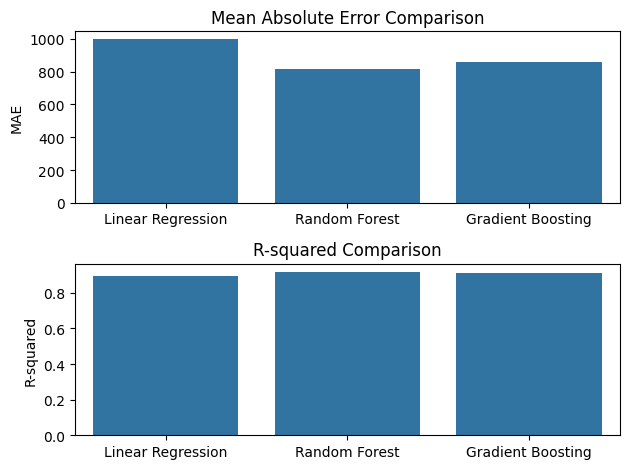

In [102]:
fig, axs = pyplot.subplots(nrows=2)
sn.barplot(x=reg_models, y=mae_list, ax=axs[0])
axs[0].set_title('Mean Absolute Error Comparison')
axs[0].set_ylabel('MAE')

sn.barplot(x=reg_models, y=r2_list, ax=axs[1])
axs[1].set_title('R-squared Comparison')
axs[1].set_ylabel('R-squared')

pyplot.tight_layout()
pyplot.show()

As we have confirmed earlier, the random forest model has the highest R-squared and the lowest MAE, which suggests the best performance. Performance-wise, the model is followed by gradient boosting, then lastly linear regression.

## B) Classification

### 1. Dataset Selection and Objective Definition

For this project, we will choose a dataset from [Kaggle](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) which estimate the obesity level of an individual while considering factors such as their country of origin, age, eating habits and physical condition. Getting insights from this dataset may allow to predit obesity in an individual and allow for targeted interventions and healthcare management strategies.


In [141]:
obesity = pd.read_csv("ObesityDataSet.csv")
obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#### Check the columns

In [104]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Here are the attributes in the dataset:
* Gender
* Age
* Height
* Weight
* family_history_with_overweight
* FAVC: Frequent consumption of high caloric food
* FCVC: Frequency of consumption of vegetables 
* NCP: Number of main meals
* CAEC: Consumption of food between meals 
* SMOKE: Smoker or not
* CH20: Consumption of water daily
* SCC: Calories consumption monitoring
* FAF: Physical activity frequency
* TUR: Time using technology devices
* CALC: Consumption of alcohol
* MTRANS: Transportation used
* Nobeyesdad: Obesity level deducted

### 2. Data Preprocessing

#### Get basic information from the dataset

In [105]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

The dataset has 2111 entries and 17 columns

#### Finding missing values

In [106]:
obesity.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

The results above shows that the dataset does not have missing values

#### Looking for duplicated observations

In [124]:
obesity.duplicated().sum()

24

There are 24 duplicated observations in the dataset, we will drop the duplicates.

In [142]:
obesity = obesity.drop_duplicates()

In [126]:
obesity.duplicated().sum()

0

#### Visualize correlation

<AxesSubplot:>

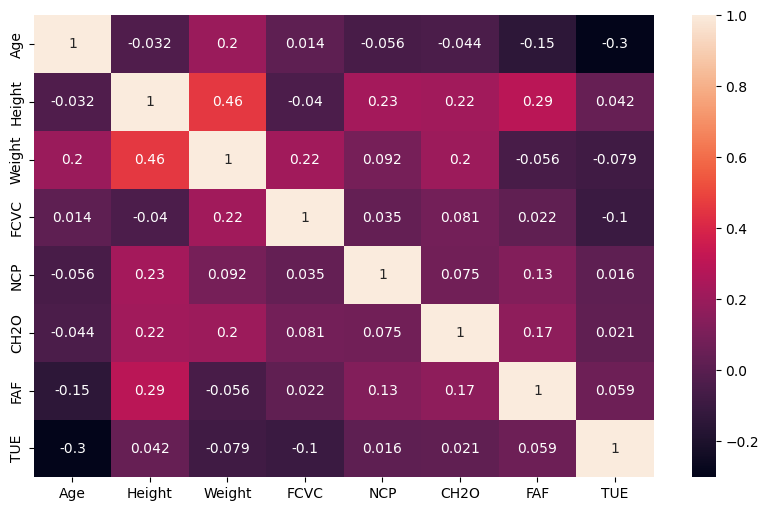

In [110]:
pyplot.figure(figsize=(10, 6))
correlations = obesity.corr(numeric_only=True)
sn.heatmap(correlations, annot=True)

From this correlation plot, we can see the correlation between the numerical variables. It seems that there aren't any attributes that are highly correlated. The highest positive correlation we can see is between **Height** and **Weight** which is 0.46.

#### Visualizing data distribution with a box plot

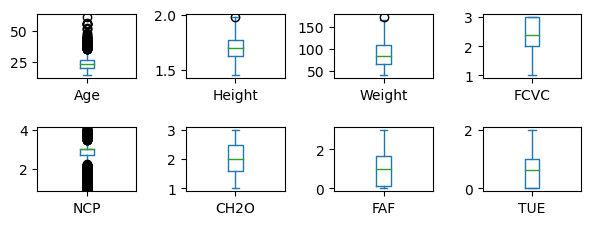

In [111]:
obesity.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False)
pyplot.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75, wspace=0.50)

We can see from the above box plots that some variables such as Age, Height, Weight and NCP have outliers. Let's inspect those variables for further insights.

##### Age against Height distribution

<AxesSubplot:xlabel='Height', ylabel='Age'>

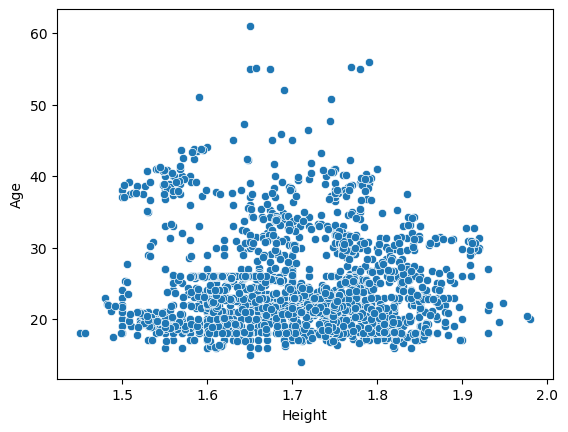

In [112]:
sn.scatterplot(data=obesity, x="Height", y="Age")

We can see from this graph that most of the individuals in the dataset are below 50 years old and shorter than 1,90m.
We can see the remaining outliers.

##### Number of main meals per day (NCP) against Age

<AxesSubplot:xlabel='Age', ylabel='NCP'>

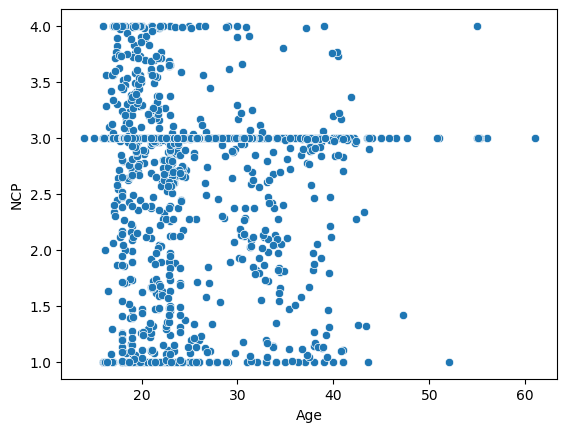

In [113]:
sn.scatterplot(data=obesity, x="Age", y="NCP")

We can see from this visualization that most of the individuals from the observation take 3 main meals per day. We can see from the other observations, that people take between 1 and 4 main meals per day.

We will not remove the outliers since they do not appear to be wrong input. These different data points allow us to correctly classify the obesity level of an individual.

#### Handling the variable types

In [114]:
obesity.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Let's look at each of the object variables and their unique values.

In [127]:
column = obesity.select_dtypes(include=['object']).columns
for i in column:
    print("Unique values for {0} :".format(i), obesity[i].unique())

Unique values for Gender : ['Female' 'Male']
Unique values for family_history_with_overweight : ['yes' 'no']
Unique values for FAVC : ['no' 'yes']
Unique values for CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
Unique values for SMOKE : ['no' 'yes']
Unique values for SCC : ['no' 'yes']
Unique values for CALC : ['no' 'Sometimes' 'Frequently' 'Always']
Unique values for MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Unique values for NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


For the object variables, we will divide the variables into three groups: binary, ordinal, and nominal.

In [143]:
continuous_variables = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

binary_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC']
                    
categorical_variables = ['CALC', 'MTRANS']

#### Adressing the binary values

In [145]:
 le = LabelEncoder()

for i in binary_variables:
    obesity[i] = le.fit_transform(obesity[i])
    
obesity.head()

<ipython-input-145-6293b6d12f78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity[i] = le.fit_transform(obesity[i])
<ipython-input-145-6293b6d12f78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity[i] = le.fit_transform(obesity[i])
<ipython-input-145-6293b6d12f78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


We can see from the table above that the binary values have been transformed into integer values.

#### Addressing the categorical variables

We will address the categorical variables with one hot encoding.

In [146]:
obesity = pd.get_dummies(obesity, columns=categorical_variables)

In [147]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,NObeyesdad,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,...,Normal_Weight,0,0,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,...,Normal_Weight,0,0,1,0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,...,Normal_Weight,0,1,0,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,...,Overweight_Level_I,0,1,0,0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,...,Overweight_Level_II,0,0,1,0,0,0,0,1,0


In [148]:
obesity.dtypes

Gender                              int32
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int32
FAVC                                int32
FCVC                              float64
NCP                               float64
CAEC                                int32
SMOKE                               int32
CH2O                              float64
SCC                                 int32
FAF                               float64
TUE                               float64
NObeyesdad                         object
CALC_Always                         uint8
CALC_Frequently                     uint8
CALC_Sometimes                      uint8
CALC_no                             uint8
MTRANS_Automobile                   uint8
MTRANS_Bike                         uint8
MTRANS_Motorbike                    uint8
MTRANS_Public_Transportation        uint8
MTRANS_Walking                    

Now, our dataset is ready for the next step.

### 3. Model Implementation and 4. Evaluation

##### Split the dataset into training and testing sets

In [149]:
X = obesity.drop(['NObeyesdad'], axis=1)
y = obesity['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.1. Decision Tree Classifier

#### Create and train the model

In [151]:
decisionTree_classifier = DecisionTreeClassifier()
decisionTree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

#### Model evaluation

In [155]:
predictions = decisionTree_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions)* 100

print(classification_report(y_test, predictions))
print(f"Accuracy:{accuracy_dt}%" )

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.92      0.90        59
      Normal_Weight       0.81      0.70      0.75        61
     Obesity_Type_I       0.94      0.96      0.95        70
    Obesity_Type_II       0.98      0.98      0.98        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.81      0.87      0.84        55
Overweight_Level_II       0.94      0.96      0.95        49

           accuracy                           0.91       418
          macro avg       0.91      0.91      0.91       418
       weighted avg       0.91      0.91      0.91       418

Accuracy:91.38755980861244%


With this model, we have an overal accuracy of around 91% which suggests that model is doing a good job.
From the result we have a list of the F1 score per each of the category of the target variable. The F1 scores ranges from 0.75 to 1, and is on average 0.91.

#### 3.2. KNeighborsClassifier

#### Create and train the model

In [156]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

#### Model evaluation

In [157]:
predictions = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, predictions)* 100

print(classification_report(y_test, predictions))
print(f"Accuracy:{accuracy_knn}%" )

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


                     precision    recall  f1-score   support

Insufficient_Weight       0.80      1.00      0.89        59
      Normal_Weight       0.90      0.46      0.61        61
     Obesity_Type_I       0.93      0.94      0.94        70
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       0.97      1.00      0.98        60
 Overweight_Level_I       0.75      0.87      0.81        55
Overweight_Level_II       0.83      0.88      0.85        49

           accuracy                           0.88       418
          macro avg       0.88      0.88      0.87       418
       weighted avg       0.89      0.88      0.87       418

Accuracy:88.03827751196172%


With this model, we have an overal accuracy of around 88% which suggets sthat model is doing a fairly good job.
From the result we have a list of the F1 score per each of the category of the target variable. 
The F1 scores ranges from 0.61 to 1, and is on average 0.87.

#### 3.3. RandomForestClassifier

In [158]:
rdf_classifier = RandomForestClassifier()
rdf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [159]:
predictions = rdf_classifier.predict(X_test)
accuracy_rdf = accuracy_score(y_test, predictions)* 100

print(classification_report(y_test, predictions))
print(f"Accuracy:{accuracy_rdf}%" )

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.92      0.95        59
      Normal_Weight       0.81      0.93      0.87        61
     Obesity_Type_I       1.00      0.96      0.98        70
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.94      0.85      0.90        55
Overweight_Level_II       0.90      0.96      0.93        49

           accuracy                           0.95       418
          macro avg       0.95      0.95      0.95       418
       weighted avg       0.95      0.95      0.95       418

Accuracy:94.73684210526315%


With this model, we have an overal accuracy of around 94% which suggests that model is doing a good job. From the result we have a list of the F1 score per each of the category of the target variable. The F1 scores ranges from 0.87 to 1, and is on average 0.95.

### 5. Results Interpretation

If we use the accuracy as a metric, the random forest model performs the best among the 3 models with an accuracy score of 94%. It is followed by the decision model and the KNeighbors model with respectively around 91% and 88% accuracy.
When using F1 score, we are getting the same results.

#### Visualizing the findings

In [163]:
f1_dt = 0.91
f1_knn = 0.87
f1_rdf = 0.95

class_models = ['Decision Tree Classifier', 'KNeighbors Classifier', 'Random Forest']
accuracy_list = [accuracy_dt, accuracy_knn, accuracy_rdf]
f1_list = [f1_dt, f1_knn, f1_rdf]

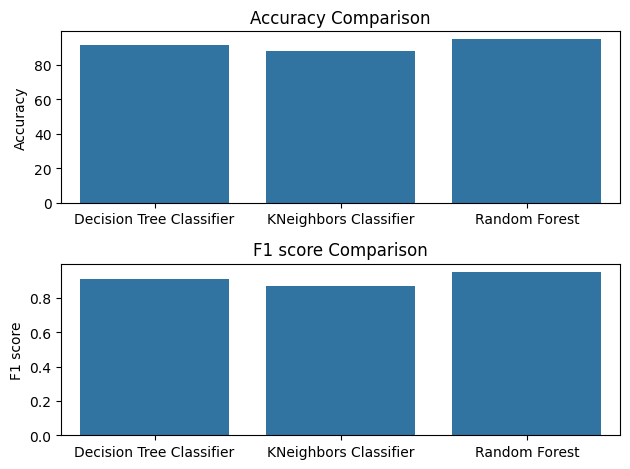

In [164]:
fig, axs = pyplot.subplots(nrows=2)
sn.barplot(x=class_models, y=accuracy_list, ax=axs[0])
axs[0].set_title('Accuracy Comparison')
axs[0].set_ylabel('Accuracy')

sn.barplot(x=class_models, y=f1_list, ax=axs[1])
axs[1].set_title('F1 score Comparison')
axs[1].set_ylabel('F1 score')

pyplot.tight_layout()
pyplot.show()

As we have stated earlier, we can see that the Random Forest model has the highest F1 Score and the best accuracy, followed by the decision tree classifier, then the KNeighbors classifier. 

## Potential implications of results in real-world scenarios

The car prediction model can be used as a starting point to generate a rough estimate of car prices for a company that wishes to enter a market. We have seen that a Random Forest Regressor performs the best. 
The obesity level prediction model can also be used as a starting point to predict obesity in individuals, helping individuals to switch their habits to become healthier.

## Summary

Through this project, we have applied regression methods to predict the price of vehicles based on features such as aspiration, door numbers, fuel types, cylinder numbers, horsepower, etc. We downloaded the dataset online from Kaggle, pre-processed it by finding missing values or duplicated values, addressing outliers, handling variable types, and feature engineering. After training a Linear Regression model, a Random Forest model, and a Gradient Boosting Regressor model, we have seen from the evaluation that the Random Forest Regressor performs better than the other models.

In the second half of this project, we have utilized classification methods to categorize the level of obesity of an individual based on their lifestyle and their background. We have also downloaded this dataset from Kaggle, and pre-processed it by finding missing values, addressing duplicated values, and transforming the variables. After creating and training a Decision Tree Classifier, a KNeighbors Classifier, and a Random Forest Classifier, we have seen that the Random Forest Classifier has the best performance.

## Reflection

The first challenge while working on this project was choosing topics that were relevant and that I found good enough to work with. I have browsed different datasets online and investigated them one by one. The only way to address this challenge was by researching. I took my time to browse different datasets on Kaggle until I found the car price prediction and the obesity classification data sets.

Then, the second challenge was finding what kind of preprocessing should I apply to the data set. We have been taught data preprocessing techniques in class, but I knew that more was expected from this project as written in the project guidelines. To address that, I researched similar problems online and investigated how machine learning practitioners solved the same issue.

This project allowed me to experiment with algorithms I have not used before, and helped me learn more about these algorithms as I had to read about them.